In [27]:
from random import randint

NR = 23

def simulate():
    REPS = 100000
    fav = 0
    for _ in range(REPS):
        a = [randint(1,365) for _ in range(NR)]
        if len(set(a))!=len(a):
            fav += 1
    return fav/REPS

def calculate():
    t = 1
    for i in range(NR):
        t=t*(365-i)/365
    return 1-t

def calculate_2():
    t = 1
    num = 1
    for i in range(NR):
        num = num*(365-i)
    den = 365**NR 
    t=num/den
    return 1-t

print("simulation: ",simulate(),", real: ",calculate()," ",calculate_2(),sep='')

Help on method randint in random:

random.randint = randint(a, b) method of random.Random instance
    Return random integer in range [a, b], including both end points.

simulation: 0.50911, real: 0.5072972343239855 0.5072972343239854


0.57168


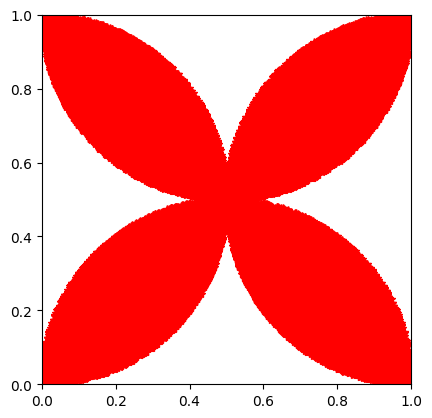

In [144]:
from matplotlib.pyplot import axis,plot
from random import random
from math import dist

SIZE = 1
axis('square')
axis((0,SIZE,0,SIZE))

def run(cond,reps):
    cnt = 0
    for _ in range(reps):
        x=random()
        y=random()
        if(cond(x,y)):
            cnt+=1
            plot(x,y,'*r')
    print(cnt/reps)

def cond_a(x,y):
    # PI/4
    P=[x,y]
    E=[SIZE/2,SIZE/2]
    return dist(P,E)<=SIZE/2

def cond_b(x,y):
    # 1/2
    P=[x,y]
    E=[SIZE/2,SIZE/2]
    DL=[0,0]
    DR=[0,SIZE]
    UL=[SIZE,0]
    UR=[SIZE,SIZE]
    return dist(P,E)<min(dist(P,DL),dist(P,DR),dist(P,UL),dist(P,UR))

def cond_c(x,y):
    # (pi-2)/2
    def get_sign(A,B,C):
    # c^2=a^2+b^2-2ab cos 
    # cos = a^2+b^2-c^2
        return A*A+B*B-C*C
    P=[x,y]
    DL=[0,0]
    DR=[0,SIZE]
    UL=[SIZE,0]
    UR=[SIZE,SIZE]

    a= [get_sign(dist(P,DL),dist(P,DR),dist(DL,DR)), get_sign(dist(P,DR),dist(P,UR),dist(UR,DR)), get_sign(dist(P,UR),dist(P,UL),dist(UL,UR)),get_sign(dist(P,DL),dist(P,UL),dist(DL,UL))]
    a.sort()
    return a[0]<0 and a[1]<0 and a[2]>0 and a[3]>0



run(cond_c,100000)